## Sentiment Analysis - News Channels (CNN, Fox)

In [1]:
# Import relevant libraries

import json
import tweepy
import csv
import re
import pandas as pd
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
cd /Users/abhishekshirsat/Desktop

/Users/abhishekshirsat/Desktop


In [5]:
#Load the API keys from csv and save in variables

log = pd.read_csv('Twitter_API_keys.csv')

In [6]:
mykey = log['Key'][0]
mysecret = log['Key'][1]
access_token = log['Key'][2]
access_token_Secret = log['Key'][3]

In [7]:
# Create authentication object
authenticate = tweepy.OAuthHandler(mykey, mysecret)

# Create access object
authenticate.set_access_token(access_token, access_token_Secret)

# Create API object
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [8]:
# Extract tweets using username

tweet_post_CNN = api.user_timeline(screen_name = 'CNN', count = 250, lang = 'en', tweet_mode = 'extended')

In [9]:
tweet_post_Fox = api.user_timeline(screen_name = 'FoxNews', count = 250, lang = 'en', tweet_mode = 'extended')

In [10]:
# for tweet in tweet_post_CNN[0:5]:
#     print(tweet.full_text + '\n')

In [11]:
# for tweet in tweet_post_Fox[0:5]:
#     print(tweet.full_text + '\n')

In [12]:
df_tweets_CNN = pd.DataFrame([tweet.full_text for tweet in tweet_post_CNN], columns = ['Tweets'])

In [13]:
df_tweets_Fox = pd.DataFrame([tweet.full_text for tweet in tweet_post_Fox], columns = ['Tweets'])

In [14]:
# df_tweets_Fox.head(5)

In [15]:
df_tweets_Fox1 = df_tweets_Fox.copy()  #checkpoint

In [16]:
df_tweets_CNN1 = df_tweets_CNN.copy()  #checkpoint

In [17]:
# Function to clean the text   
#https://towardsdatascience.com/another-twitter-sentiment-analysis-bb5b01ebad90

import re
def cleanText(text):
    text = re.sub(r'@[A-Za-z0-9]+','', text) #removes @mentions
    text = re.sub("[^a-zA-Z]", " ", text) #removes #
    text = re.sub(r'RT[\s+]', '', text)  #removes RT
    text = re.sub('https?://[A-Za-z0-9./]+','', text) # removes url
    
    return text

In [18]:
df_tweets_Fox1['Tweets'] = df_tweets_Fox1['Tweets'].apply(cleanText)

In [19]:
df_tweets_CNN1['Tweets'] = df_tweets_CNN1['Tweets'].apply(cleanText)

In [20]:
# df_tweets_Fox1.head(5)

In [21]:
df_tweets_Fox_clean = df_tweets_Fox1.copy()

In [22]:
df_tweets_CNN_clean = df_tweets_CNN1.copy()

In [23]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [24]:
df_tweets_Fox_clean['Subjectivity'] = df_tweets_Fox_clean['Tweets'].apply(getSubjectivity)
df_tweets_Fox_clean['Polarity'] = df_tweets_Fox_clean['Tweets'].apply(getPolarity)

In [25]:
df_tweets_CNN_clean['Subjectivity'] = df_tweets_CNN_clean['Tweets'].apply(getSubjectivity)
df_tweets_CNN_clean['Polarity'] = df_tweets_CNN_clean['Tweets'].apply(getPolarity)

In [26]:
# df_tweets_Fox_clean.head(10)

In [27]:
#Label Positive, negative, neutral based on polarity

def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [28]:
df_tweets_Fox_clean['Analysis'] = df_tweets_Fox_clean['Polarity'].apply(getAnalysis)

In [29]:
df_tweets_CNN_clean['Analysis'] = df_tweets_CNN_clean['Polarity'].apply(getAnalysis)

In [30]:
df_tweets_Fox_clean.head()

,Tweets,Subjectivity,Polarity,Analysis
0,Interesting moments from Amy Coney Barrett s...,0.500000,0.500000,Positive
1,BIG TECH BACKLASHPublished mins ago Twitter...,0.100000,-0.050000,Negative
2,Sen John Kennedy New Hunter Biden report as ...,0.560606,-0.098485,Negative
3,Trump administration secures release of two Am...,0.000000,0.000000,Neutral
4,Amy Coney Barrett tells Democratic senator I...,1.000000,0.600000,Positive


In [35]:
df_tweets_CNN_clean.head()

,Tweets,Subjectivity,Polarity,Analysis
0,Being weak as my grandfather understood i...,0.585227,-0.073864,Negative
1,Only half of registered voters in the United S...,0.430303,-0.032576,Negative
2,asks How can President Trump keep holding p...,0.775000,0.025000,Positive
3,With just days to go until the election ...,0.800000,0.400000,Positive
4,This is all part of the reckless approach tha...,0.050000,-0.100000,Negative


In [36]:
df_CNN = df_tweets_CNN_clean[['Polarity', 'Subjectivity']]
# df_CNN.head()

In [37]:
df_Fox = df_tweets_Fox_clean[['Polarity', 'Subjectivity']]
# df_Fox.head()

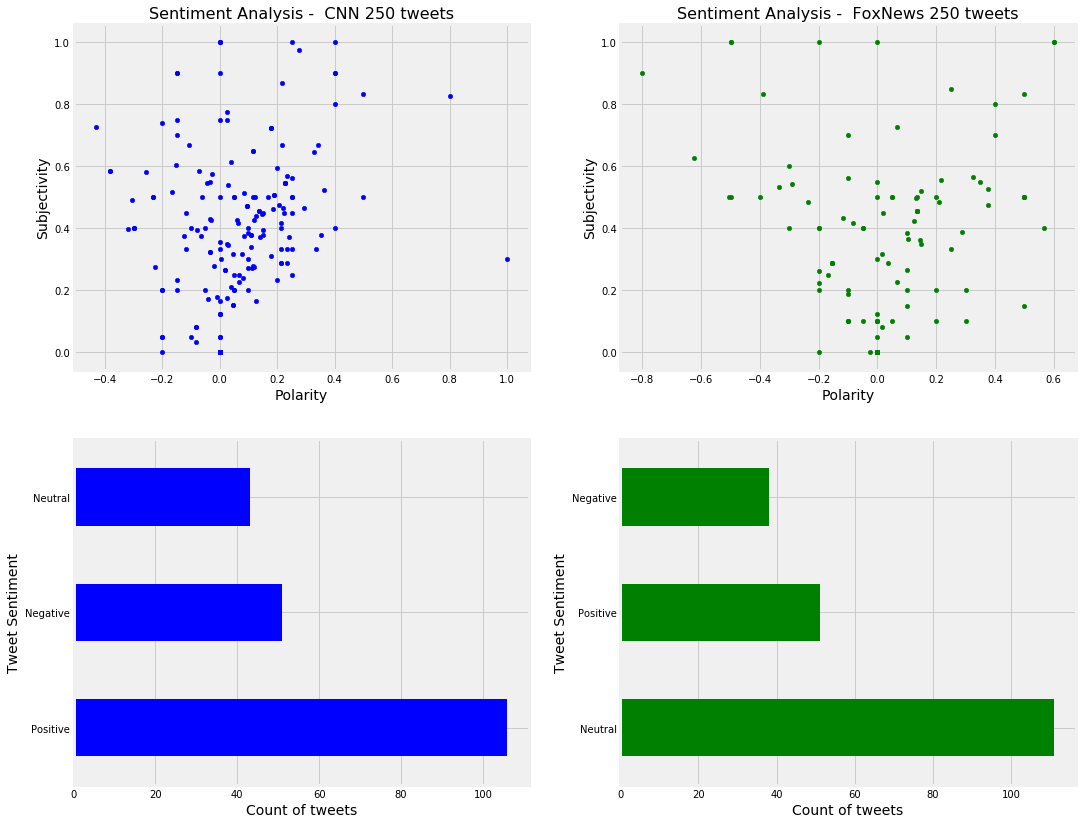

In [39]:
fig = plt.figure(figsize = (16, 14)) # create figure

ax0 = fig.add_subplot(2, 2, 1) 
ax1 = fig.add_subplot(2, 2, 2) 
ax2 = fig.add_subplot(2, 2, 3) 
ax3 = fig.add_subplot(2, 2, 4) 

df_CNN.plot(kind='scatter', x='Polarity', y='Subjectivity', color = 'blue', ax=ax0)
ax0.set_title('Sentiment Analysis -  CNN 250 tweets', fontsize = 16)
ax0.set_xlabel('Polarity', fontsize = 14)
ax0.set_ylabel('Subjectivity', fontsize = 14)

df_Fox.plot(kind='scatter', x='Polarity', y='Subjectivity', color = 'green', ax=ax1)
ax1.set_title('Sentiment Analysis -  FoxNews 250 tweets', fontsize = 16 )
ax1.set_xlabel('Polarity', fontsize = 14)
ax1.set_ylabel('Subjectivity', fontsize = 14)

df_tweets_CNN_clean['Analysis'].value_counts().plot(kind = 'barh', color = 'blue', ax = ax2)
df_tweets_Fox_clean['Analysis'].value_counts().plot(kind = 'barh', color = 'green', ax = ax3)

# ax2.set_title('Sentiment Analysis -  CNN 250 tweets', fontsize = 16)
ax2.set_xlabel('Count of tweets', fontsize = 14)
ax2.set_ylabel('Tweet Sentiment', fontsize = 14)

# ax3.set_title('Sentiment Analysis -  Fox 250 tweets', fontsize = 16)
ax3.set_xlabel('Count of tweets', fontsize = 14)
ax3.set_ylabel('Tweet Sentiment', fontsize = 14)

plt.show()

In [40]:
plt.savefig('Sentiment1.png')

<Figure size 432x288 with 0 Axes>

In [41]:
fig.savefig('Sentiment2.png')

In [ ]:
# % positive tweets
posTweets = df_tweets_CNN_clean[df_tweets_CNN_clean.Analysis == 'Positive']
posTweets = posTweets['Tweets']

round((posTweets.shape[0]/df_tweets_CNN_clean.shape[0])*100, 1)

In [ ]:
negTweets = df_tweets_CNN_clean[df_tweets_CNN_clean.Analysis == 'Negative']
negTweets = negTweets['Tweets']

round((negTweets.shape[0]/df_tweets_CNN_clean.shape[0])*100, 1)

In [ ]:
# % positive tweets
posTweets = df_tweets_Fox_clean[df_tweets_Fox_clean.Analysis == 'Positive']
posTweets = posTweets['Tweets']

round((posTweets.shape[0]/df_tweets_Fox_clean.shape[0])*100, 1)

In [ ]:
negTweets = df_tweets_Fox_clean[df_tweets_Fox_clean.Analysis == 'Negative']
negTweets = negTweets['Tweets']

round((negTweets.shape[0]/df_tweets_Fox_clean.shape[0])*100, 1)